In [32]:
from scipy import stats as st
from scipy.stats import chisquare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro

In [33]:
survey_raw = pd.read_csv("Raw_survey_data.csv")
survey_raw["dummy"] = [1]*1600
survey_raw = survey_raw.rename(columns = {'q4':'LOIF','q5':'LOTM','q8':'LOIT','q17':'House_Status','q18':'Household_Status','q19':'Grocery_Budget_Strictness','Age_Catagory':"Age Category"},errors="raise")


Age Category
2    275
3    310
4    396
5    336
6    283
Name: dummy, dtype: int64
Statistics=0.912, p=0.480


Text(0.5, 1.0, 'Population distrubtion of Age Category')

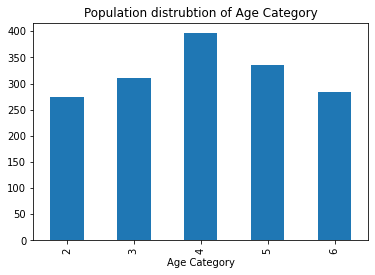

In [34]:
#--------------------------------------------------------------------------------#
#Before Running Anova, Test for normality                                                           #  
#--------------------------------------------------------------------------------#
data = survey_raw.groupby("Age Category").count()
data = data["dummy"]
print(data)
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
data.plot(kind = "bar")
plt.title("Population distrubtion of Age Category")

F_onewayResult(statistic=3.5345040296791903, pvalue=0.007030069382879867)


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.0211,0.9,-0.2278,0.2701,False
1,3,-0.0664,0.9,-0.32,0.1871,False
1,4,-0.0995,0.8318,-0.3684,0.1694,False
1,5,-0.7291,0.004,-1.294,-0.1642,True
2,3,-0.0875,0.8837,-0.3477,0.1726,False
2,4,-0.1206,0.7259,-0.3957,0.1545,False
2,5,-0.7502,0.0029,-1.3181,-0.1823,True
3,4,-0.0331,0.9,-0.3124,0.2462,False
3,5,-0.6627,0.0132,-1.2326,-0.0927,True
4,5,-0.6296,0.0244,-1.2065,-0.0526,True


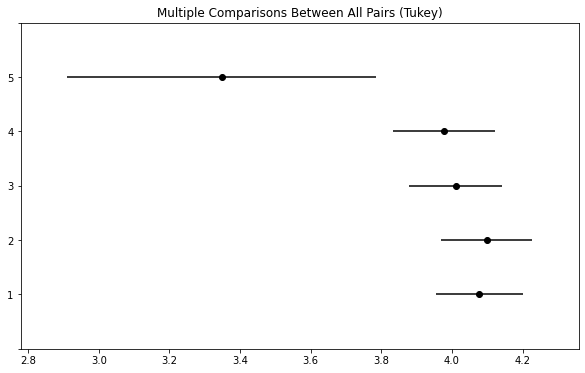

In [35]:
#--------------------------------------------------------------------------------#
#ANOVA ON Age Category and LOIT                                                           #  
#--------------------------------------------------------------------------------#
age_and_loit = survey_raw[{"LOIT","Age Category"}]
group_by_Age_Category = age_and_loit.groupby("LOIT")
groups = []
lotmlabel = []
ages = []

for i in range(1,6):
    for each in group_by_Age_Category.get_group(i)["Age Category"]:
        ages.append(each)
        lotmlabel.append(i)
    groups.append(group_by_Age_Category.get_group(i)["Age Category"])
print(st.f_oneway(*groups))
#Post-HOC
tukey = pairwise_tukeyhsd(endog = ages,
                        groups = lotmlabel,
                         alpha = 0.05)

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=60,ymin=-0.5,ymax=4.5, color="red")
plt

tukey.summary()